# Problem statement



Context
The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam.

Content
The files contain one message per line. Each line is composed by two columns: v1 contains the label (ham or spam) and v2 contains the raw text.

This corpus has been collected from free or free for research sources at the Internet:

-> A collection of 425 SMS spam messages was manually extracted from the Grumbletext Web site. This is a UK forum in which cell phone users make public claims about SMS spam messages, most of them without reporting the very spam message received. The identification of the text of spam messages in the claims is a very hard and time-consuming task, and it involved carefully scanning hundreds of web pages. The Grumbletext Web site is: [Web Link].
-> A subset of 3,375 SMS randomly chosen ham messages of the NUS SMS Corpus (NSC), which is a dataset of about 10,000 legitimate messages collected for research at the Department of Computer Science at the National University of Singapore. The messages largely originate from Singaporeans and mostly from students attending the University. These messages were collected from volunteers who were made aware that their contributions were going to be made publicly available. The NUS SMS Corpus is avalaible at: [Web Link].
-> A list of 450 SMS ham messages collected from Caroline Tag's PhD Thesis available at [Web Link].
-> Finally, we have incorporated the SMS Spam Corpus v.0.1 Big. It has 1,002 SMS ham messages and 322 spam messages and it is public available at: [Web Link]. This corpus has been used in the following academic researches:

Acknowledgements
The original dataset can be found here. The creators would like to note that in case you find the dataset useful, please make a reference to previous paper and the web page: http://www.dt.fee.unicamp.br/~tiago/smsspamcollection/ in your papers, research, etc.

We offer a comprehensive study of this corpus in the following paper. This work presents a number of statistics, studies and baseline results for several machine learning methods.

Almeida, T.A., GÃ³mez Hidalgo, J.M., Yamakami, A. Contributions to the Study of SMS Spam Filtering: New Collection and Results. Proceedings of the 2011 ACM Symposium on Document Engineering (DOCENG'11), Mountain View, CA, USA, 2011.

Inspiration
Can you use this dataset to build a prediction model that will accurately classify which texts are spam?

# Importing Libraries

In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import nltk
import re

# Data Insepction

In [153]:
user_data = pd.read_csv('spam.csv',encoding='latin-1')

In [154]:
user_data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [155]:
user_data["v1"].value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

In [156]:
user_data["v1"].value_counts()/user_data.shape[0]*100

ham     86.593683
spam    13.406317
Name: v1, dtype: float64

In [157]:
user_data.drop(labels=user_data[["Unnamed: 2","Unnamed: 3","Unnamed: 4"]],axis=1,inplace=True)

In [158]:
user_data = user_data.rename(columns={'v1':'label','v2':'text'})

In [159]:
user_data

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [160]:
user_data['text'].value_counts().sum()

5572

In [161]:
user_data.isnull().sum()

label    0
text     0
dtype: int64

In [162]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [163]:
user_data.describe()

,label,text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [164]:
user_data.dtypes

label    object
text     object
dtype: object

In [165]:
user_data['text_length'] = user_data['text'].apply(lambda x: len(x.split(' ')))
user_data.head()

,label,text,text_length
0,ham,"Go until jurong point, crazy.. Available only ...",20
1,ham,Ok lar... Joking wif u oni...,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,28
3,ham,U dun say so early hor... U c already then say...,11
4,ham,"Nah I don't think he goes to usf, he lives aro...",13


In [166]:
max(user_data['text_length'])

171

# EDA

In [167]:

user_data["label"].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

c:\users\naveen\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='label', ylabel='count'>

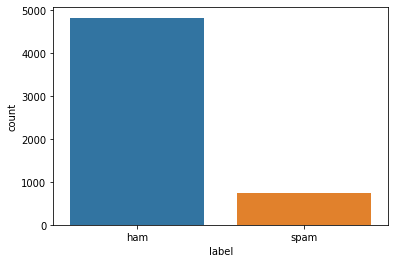

In [168]:
sns.countplot(user_data["label"])

# Text PreProcessing

### Removing Punctuations,Numbers and Specaial Characters

In [169]:
def data_cleaning(text):
    clean_text = re.sub('[^A-Za-z]+'," ",text)
    return clean_text

In [170]:
user_data['text_clean'] = user_data['text'].apply(lambda text : data_cleaning(text))

In [171]:
user_data

,label,text,text_length,text_clean
0,ham,"Go until jurong point, crazy.. Available only ...",20,Go until jurong point crazy Available only in ...
1,ham,Ok lar... Joking wif u oni...,6,Ok lar Joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,28,Free entry in a wkly comp to win FA Cup final ...
3,ham,U dun say so early hor... U c already then say...,11,U dun say so early hor U c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",13,Nah I don t think he goes to usf he lives arou...
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,30,This is the nd time we have tried contact u U ...
5568,ham,Will Ì_ b going to esplanade fr home?,8,Will b going to esplanade fr home
5569,ham,"Pity, * was in mood for that. So...any other s...",10,Pity was in mood for that So any other suggest...
5570,ham,The guy did some bitching but I acted like i'd...,26,The guy did some bitching but I acted like i d...


In [172]:
user_data['text_lower'] = user_data['text'].apply(lambda text: data_cleaning(text).lower())

In [173]:
user_data

,label,text,text_length,text_clean,text_lower
0,ham,"Go until jurong point, crazy.. Available only ...",20,Go until jurong point crazy Available only in ...,go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif u oni...,6,Ok lar Joking wif u oni,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,28,Free entry in a wkly comp to win FA Cup final ...,free entry in a wkly comp to win fa cup final ...
3,ham,U dun say so early hor... U c already then say...,11,U dun say so early hor U c already then say,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",13,Nah I don t think he goes to usf he lives arou...,nah i don t think he goes to usf he lives arou...
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,30,This is the nd time we have tried contact u U ...,this is the nd time we have tried contact u u ...
5568,ham,Will Ì_ b going to esplanade fr home?,8,Will b going to esplanade fr home,will b going to esplanade fr home
5569,ham,"Pity, * was in mood for that. So...any other s...",10,Pity was in mood for that So any other suggest...,pity was in mood for that so any other suggest...
5570,ham,The guy did some bitching but I acted like i'd...,26,The guy did some bitching but I acted like i d...,the guy did some bitching but i acted like i d...


#### Removal of stop words

In [174]:
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Naveen\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [175]:
stop_words = stopwords.words('english')
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [176]:
stop_words = stopwords.words('english')
more_stopwords = ['u', 'im', 'c']
stop_words = stop_words + more_stopwords

def remove_stopwords(text):
    text = ' '.join(word for word in text.split(' ') if word not in stop_words)
    return text

In [177]:
user_data['text_remove_stopwards'] = user_data['text_lower'].apply(remove_stopwords)

In [178]:
user_data

,label,text,text_length,text_clean,text_lower,text_remove_stopwards
0,ham,"Go until jurong point, crazy.. Available only ...",20,Go until jurong point crazy Available only in ...,go until jurong point crazy available only in ...,go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,6,Ok lar Joking wif u oni,ok lar joking wif u oni,ok lar joking wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,28,Free entry in a wkly comp to win FA Cup final ...,free entry in a wkly comp to win fa cup final ...,free entry wkly comp win fa cup final tkts st ...
3,ham,U dun say so early hor... U c already then say...,11,U dun say so early hor U c already then say,u dun say so early hor u c already then say,dun say early hor already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",13,Nah I don t think he goes to usf he lives arou...,nah i don t think he goes to usf he lives arou...,nah think goes usf lives around though
...,...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,30,This is the nd time we have tried contact u U ...,this is the nd time we have tried contact u u ...,nd time tried contact pound prize claim easy c...
5568,ham,Will Ì_ b going to esplanade fr home?,8,Will b going to esplanade fr home,will b going to esplanade fr home,b going esplanade fr home
5569,ham,"Pity, * was in mood for that. So...any other s...",10,Pity was in mood for that So any other suggest...,pity was in mood for that so any other suggest...,pity mood suggestions
5570,ham,The guy did some bitching but I acted like i'd...,26,The guy did some bitching but I acted like i d...,the guy did some bitching but i acted like i d...,guy bitching acted like interested buying some...


# Text Normalization

#### Stemming

In [179]:
stemmer = nltk.SnowballStemmer("english")

def stemm_text(text):
    text = ' '.join(stemmer.stem(word) for word in text.split(' '))
    return text

In [180]:
user_data['Stemming'] = user_data['text_remove_stopwards'].apply(stemm_text)

In [181]:
user_data

,label,text,text_length,text_clean,text_lower,text_remove_stopwards,Stemming
0,ham,"Go until jurong point, crazy.. Available only ...",20,Go until jurong point crazy Available only in ...,go until jurong point crazy available only in ...,go jurong point crazy available bugis n great ...,go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,6,Ok lar Joking wif u oni,ok lar joking wif u oni,ok lar joking wif oni,ok lar joke wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,28,Free entry in a wkly comp to win FA Cup final ...,free entry in a wkly comp to win fa cup final ...,free entry wkly comp win fa cup final tkts st ...,free entri wkli comp win fa cup final tkts st ...
3,ham,U dun say so early hor... U c already then say...,11,U dun say so early hor U c already then say,u dun say so early hor u c already then say,dun say early hor already say,dun say earli hor alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",13,Nah I don t think he goes to usf he lives arou...,nah i don t think he goes to usf he lives arou...,nah think goes usf lives around though,nah think goe usf live around though
...,...,...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,30,This is the nd time we have tried contact u U ...,this is the nd time we have tried contact u u ...,nd time tried contact pound prize claim easy c...,nd time tri contact pound prize claim easi cal...
5568,ham,Will Ì_ b going to esplanade fr home?,8,Will b going to esplanade fr home,will b going to esplanade fr home,b going esplanade fr home,b go esplanad fr home
5569,ham,"Pity, * was in mood for that. So...any other s...",10,Pity was in mood for that So any other suggest...,pity was in mood for that so any other suggest...,pity mood suggestions,piti mood suggest
5570,ham,The guy did some bitching but I acted like i'd...,26,The guy did some bitching but I acted like i d...,the guy did some bitching but i acted like i d...,guy bitching acted like interested buying some...,guy bitch act like interest buy someth els nex...


# Text Vector

### Target Encoding

In [182]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(user_data['label'])

user_data['target_encoded'] = le.transform(user_data['label'])

In [183]:
user_data.head()

,label,text,text_length,text_clean,text_lower,text_remove_stopwards,Stemming,target_encoded
0,ham,"Go until jurong point, crazy.. Available only ...",20,Go until jurong point crazy Available only in ...,go until jurong point crazy available only in ...,go jurong point crazy available bugis n great ...,go jurong point crazi avail bugi n great world...,0
1,ham,Ok lar... Joking wif u oni...,6,Ok lar Joking wif u oni,ok lar joking wif u oni,ok lar joking wif oni,ok lar joke wif oni,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,28,Free entry in a wkly comp to win FA Cup final ...,free entry in a wkly comp to win fa cup final ...,free entry wkly comp win fa cup final tkts st ...,free entri wkli comp win fa cup final tkts st ...,1
3,ham,U dun say so early hor... U c already then say...,11,U dun say so early hor U c already then say,u dun say so early hor u c already then say,dun say early hor already say,dun say earli hor alreadi say,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",13,Nah I don t think he goes to usf he lives arou...,nah i don t think he goes to usf he lives arou...,nah think goes usf lives around though,nah think goe usf live around though,0


### Bag of words

In [184]:
from sklearn.feature_extraction.text import CountVectorizer
review_vectorizer = CountVectorizer()

review_features  =  review_vectorizer.fit_transform(user_data['Stemming'])
review_features.get_shape()

(5572, 6216)

In [185]:
review_features

<5572x6216 sparse matrix of type '<class 'numpy.int64'>'
	with 44756 stored elements in Compressed Sparse Row format>

In [186]:
x = review_features
y = user_data['target_encoded'] 

In [187]:
x

<5572x6216 sparse matrix of type '<class 'numpy.int64'>'
	with 44756 stored elements in Compressed Sparse Row format>

In [188]:
y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: target_encoded, Length: 5572, dtype: int32

In [189]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 47, test_size = 0.25)

# Modeling

## Decison Trees

In [190]:
from sklearn import tree
model = tree.DecisionTreeClassifier(random_state=1)
model.fit(x_train,y_train)
pred= model.predict(x_test)

from sklearn import metrics as m
# Accuracy
acc= m.accuracy_score(y_test,pred)
acc

0.9605168700646087

## Navies bayes

In [191]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train,y_train)
pred= model.predict(x_test)

from sklearn import metrics as m
# Accuracy
acc= m.accuracy_score(y_test,pred)
acc

0.9712849964106246

## Logistic Regression

In [192]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)
pred= model.predict(x_test)

from sklearn import metrics as m
# Accuracy
acc= m.accuracy_score(y_test,pred)
acc

0.9763101220387652

## SVM

In [193]:
from sklearn.svm import SVC
model = SVC()
model.fit(x_train,y_train)
pred= model.predict(x_test)

from sklearn import metrics as m
# Accuracy
acc= m.accuracy_score(y_test,pred)
acc

0.9741564967695621

## XG Boost

In [194]:
import xgboost as xgb
model=xgb.XGBClassifier(random_state=1,learning_rate=0.01)
model.fit(x_train,y_train)
pred= model.predict(x_test)

from sklearn import metrics as m
# Accuracy
acc= m.accuracy_score(y_test,pred)
acc

C:\Users\Naveen\AppData\Roaming\Python\Python37\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:22:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.9475951184493898

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier 
model = RandomForestClassifier(n_estimators= 700)
model.fit(x_train,y_train)
pred= model.predict(x_test)

from sklearn import metrics as m
# Accuracy
acc= m.accuracy_score(y_test,pred)
acc

## Ada Boost

In [151]:
from sklearn.ensemble import AdaBoostClassifier
model=AdaBoostClassifier(random_state = 42)
model.fit(x_train,y_train,)
pred=model.predict(x_test)
from sklearn import metrics as m
acc=m.accuracy_score(y_test,pred)
acc

0.9655419956927495